# MIR Task: Automatic Drum Transcription

According to MIREX2018 , drum transcription is defined as the task of de-tecting the positions in time and labeling the drum class of drum instrument onsets in polyphonic music. The article A Review of Automatic Drum Transcription offers an in-debt explanation about automatic drum transcription as well as an extremely up to date state of the art.
The present task proposes to test and evaluate an automatic drum transcription algorithm, implemented using ADTLib and Essentia, in a beatbox (vocal percussion) dataset.

This notebook requires ADTLib. See ADTLib repo for installation instructions. If you experience problems, be sure to install the latest versions of tensorflow and dask.


In [72]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import csv
from ADTLib import ADT
import mir_eval

# 1) Beatboxset1

The beatboxset1: beatboxing audio data set available in the Audio Content Analysis contains beatboxing recordings from various contributors, who recorded the clips themselves in various conditions. There is a spreadsheet file "beatboxset1.csv" accompanying the dataset that provides metadata for the recordings. Further annotations of the recordings are also included: these mark the positions of onsets as well as categorizing the events into a handful of standard classes.
 * k  = kick
 * hc = hihat, closed
 * ho = hihat, open
 * sb = snare, "bish" or "pss" -like
 * sk = snare, "k" -like  (may sound like a "clap" or "rimshot" snare)
 * s  = snare but not sure which of the above types (or isn't either of them)
 * br = a breath sound (not intended to sound like percussion)
 * m  = humming (or similar, a note with no drum-like or speech-like nature)
 * v  = speech or singing
 * x  = miscellaneous other sound (identifiable, but not fitting one of the other categories)
 * ?  = unsure of classification
 
In order to compare the handmade annotations and the output of the ADTLIB, the previous categorization will be reduce to three different categories: Kick, Snare and Hihat
 * Kick  = k
 * Snare = sb, sk, s
 * Hihat = hc,ho


In [73]:
dict_bb = {}
filenames = []
dataframes = []

def strip_end(text, suffix):
    if not text.endswith(suffix):
        return text
    return text[:len(text)-len(suffix)] 

df = pd.read_csv('beatboxset1/beatboxset1.csv', sep=',', error_bad_lines=False, index_col=False, dtype='unicode')

for i , filename in enumerate(df.Filename):
    name = strip_end(filename, '.wav')
    df_temp = pd.read_csv('beatboxset1/Annotations_DR/' + name +'.csv', sep=',',header=None, dtype='unicode')
    dataframes.append(df_temp) 
    filenames.append(name)

In [74]:
def get_nested(data, *args):
    if args and data:
        element  = args[0]
        if element:
            value = data.get(element)
            return value if len(args) == 1 else get_nested(value, *args[1:])

for i, filename in enumerate(filenames):
    dict_bb[filename] = {}
    dict_bb[filename]['Kick'] = []
    dict_bb[filename]['Snare'] = []
    dict_bb[filename]['Hihat'] = []
    
#dict_bb[filename]['Kick'].append(2)    
#display(dict_bb)  
#get_nested(dict_bb, "callout_adiao" )

In [105]:
#Kick
for i, df in enumerate(dataframes):
    df1 = df[df[1].str.contains("k")] 
    indexNames = df1[df1[1]=='sk'].index
    df2 = df1.copy()
    df2.drop(indexNames, inplace=True)
    t = list(df2[0])
    t = np.asarray(t)
    dict_bb[filenames[i]]['Kick'] = t  

#Snare
for i, df in enumerate(dataframes): 
    df1 = df[df[1].str.contains("s")] 
    t =list(df1[0])
    t = np.asarray(t)
    dict_bb[filenames[i]]['Snare'] = t 

#Hihat
for i, df in enumerate(dataframes): 
    df1 = df[df[1].str.contains("h")] 
    t =list(df1[0])
    t = np.asarray(t)
    dict_bb[filenames[i]]['Hihat'] = t 
    
#print(list(df[0]))
#print(dict_bb)
#get_nested(dict_bb, "callout_adiao" )


# 2) ADTLib

Automatic Drum Transcription Library (ADTLib) is a library that contains open source ADT algorithms to aid other researchers in areas of music infor- mation retrieval (MIR). The algorithms return both a .txt file of kick drum, snare drum, and hi-hat onsets and an automatically generated drum tablature. Further information about the library and how it was implemented can be found on Automatic drum transcription for polyphonic recordings using soft attention mechanisms and convolutional neural networks.



In [76]:
dict_ADT = {}

for i, filename in enumerate(filenames):
    name = filename + '.wav'
    dict_ADT[filename] = ADT(['beatboxset1/'+ name])[0]

INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restor

/anaconda3/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/KickADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/SnareADTLibAll
INFO:tensorflow:Restoring parameters from /anaconda3/lib/python3.6/site-packages/ADTLib/files/HihatADTLibAll
INFO:tensorflow:Restor

In [106]:
#get_nested(dict_ADT, "callout_adiao" )

# 2) Evaluation


The evaluation method focus in understanding how well the implemented algo- rithm performs by comparing the hand-made annotations, available in the data set, to the annotations produced by the algorithm. To do this, a F-measure value will be computed for each different sound: kick, snare and hi-hat.  After an F-measure is computed for each individual sound, a value combing these 3 different F-measure values will be calculated.

The library mir_eval will be used to make the calculation of the F-measure.

mir_eval.onset.evaluate: determine which estimated onsets are “correct”, where correctness is defined as being within a small window of a reference onset.

https://github.com/craffel/mir_eval

Colin Raffel, Brian McFee, Eric J. Humphrey, Justin Salamon, Oriol Nieto, Dawen Liang, and Daniel P. W. Ellis, "mir_eval: A Transparent Implementation of Common MIR Metrics", Proceedings of the 15th International Conference on Music Information Retrieval, 2014.


In [168]:
#mir_eval.onset.evaluate(ref_onsets, est_onsets, window=0.002)
dict_FM = {}

#for plotting 
list_Kick = []
list_Snare = []
list_Hihat = []

for i, filename in enumerate(filenames):
    u1 = np.fromiter(dict_bb[filename]['Kick'], dtype = float)
    a1 = np.fromiter(dict_ADT[filename]['Kick'], dtype = float)
    measure_kick = mir_eval.onset.evaluate(u1,a1,window=0.25)
    list_Kick.append(measure_kick['F-measure'])
    
    u2 = np.fromiter(dict_bb[filename]['Snare'], dtype = float)
    a2 = np.fromiter(dict_ADT[filename]['Snare'], dtype = float)
    measure_snare = mir_eval.onset.evaluate(u2,a2,window=0.25)
    list_Snare.append(measure_snare['F-measure'])
    
    u3 = np.fromiter(dict_bb[filename]['Hihat'], dtype = float)
    a3 = np.fromiter(dict_ADT[filename]['Hihat'], dtype = float)
    measure_Hihat = mir_eval.onset.evaluate(u3,a3,window=0.25)
    list_Hihat.append(measure_Hihat['F-measure'])
    
    dict_FM[filename] = (measure_kick['F-measure'],measure_snare['F-measure'],measure_hihat['F-measure'])
    
    
    

/anaconda3/lib/python3.6/site-packages/mir_eval/onset.py:49: UserWarning: Reference onsets are empty.
  warnings.warn("Reference onsets are empty.")


In [169]:
#display(dict_FM)
display(list_Hihat)
display(list_Snare)

[0.6051660516605167,
 0.6459627329192548,
 0.71900826446281,
 0.3916083916083916,
 0.7397260273972602,
 0.43750000000000006,
 0.6666666666666666,
 0.2605042016806723,
 0.4873417721518987,
 0.8609865470852018,
 0.017857142857142856,
 0.7088607594936709,
 0.27272727272727276,
 0.379746835443038]

[0.4919786096256685,
 0.6262626262626262,
 0.9428571428571428,
 0.5454545454545454,
 0.7428571428571429,
 0.45283018867924524,
 0.8,
 0.46153846153846156,
 0.5429864253393665,
 0.8172043010752689,
 0.31304347826086953,
 0.7591240875912408,
 0.673076923076923,
 0.7906976744186047]

# 3) Results

What are the results?
 * Make a graph with all different f measures? for each song


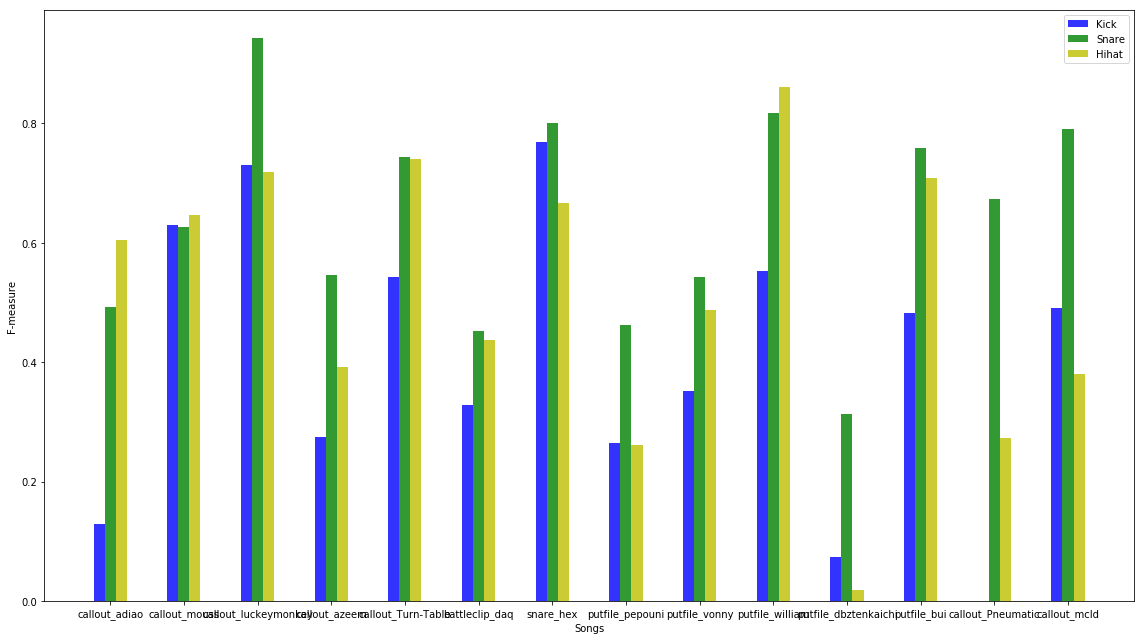

In [182]:
n_groups = 14

means_Kick = list_Kick
means_Snare = list_Snare
means_Hihat = list_Hihat

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, means_Kick, bar_width, alpha=opacity, color='b', label='Kick')
rects2 = plt.bar(index + bar_width, means_Snare, bar_width, alpha=opacity, color='g', label='Snare')
rects3 = plt.bar(index + 0.3, means_Hihat, bar_width, alpha=opacity, color='y', label='Hihat')

plt.xlabel('Songs')
plt.ylabel('F-measure')
plt.xticks(index + bar_width, filenames)
plt.legend()
 
plt.tight_layout()
plt.rcParams["figure.figsize"] = [20,9]
plt.show()
